<a href="https://colab.research.google.com/github/Sidharthwhitehats/Ensimag-Wind-forecasting/blob/main/copy_of_ensimag_wind_power_forecasting_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

ensimag_mmis_2024_path = kagglehub.competition_download('ensimag-mmis-2024')

print('Data source import complete.')


100%|██████████| 511k/511k [00:00<00:00, 61.9MB/s]

Extracting files...
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:

ensimag_mmis_2024_path = kagglehub.competition_download('ensimag-mmis-2024')
train_csv_path = os.path.join(ensimag_mmis_2024_path, 'train.csv')

In [5]:
df=pd.read_csv(train_csv_path)

In [6]:
df

,date,u10,v10,u100,v100,production
0,2020-01-01 01:00:00,2.124600,-2.681966,2.864280,-3.666076,0.000000
1,2020-01-01 02:00:00,2.521695,-1.796960,3.344859,-2.464761,0.054879
2,2020-01-01 03:00:00,2.672210,-0.822516,3.508448,-1.214093,0.110234
3,2020-01-01 04:00:00,2.457504,-0.143642,3.215233,-0.355546,0.165116
4,2020-01-01 05:00:00,2.245898,0.389576,2.957678,0.332701,0.156940
...,...,...,...,...,...,...
8778,2020-12-31 19:00:00,1.201009,0.682997,2.862055,1.878258,0.065501
8779,2020-12-31 20:00:00,1.917654,1.455812,2.825571,2.288703,0.092285
8780,2020-12-31 21:00:00,2.192580,1.544936,3.010909,2.230068,0.042477
8781,2020-12-31 22:00:00,2.416432,1.232599,3.255107,1.724829,0.104407


In [7]:
df['date'].describe()

,date
count,8783
unique,8783
top,2020-12-31 23:00:00
freq,1


In [ ]:
df.tail()

,date,u10,v10,u100,v100,production
8778,2020-12-31 19:00:00,1.201009,0.682997,2.862055,1.878258,0.065501
8779,2020-12-31 20:00:00,1.917654,1.455812,2.825571,2.288703,0.092285
8780,2020-12-31 21:00:00,2.192580,1.544936,3.010909,2.230068,0.042477
8781,2020-12-31 22:00:00,2.416432,1.232599,3.255107,1.724829,0.104407
8782,2020-12-31 23:00:00,2.785927,1.088073,3.729396,1.454131,0.077530


In [ ]:
df.isna().sum()# to confirm whetherbthere is any na

,0
date,0
u10,0
v10,0
u100,0
v100,0
production,0


In [ ]:
df['date']=pd.to_datetime(df['date'])


In [ ]:
# scale the datas except date
from sklearn.preprocessing import MinMaxScaler

model = MinMaxScaler(feature_range = (0,1))
#model = MinMaxScaler()


In [ ]:
# Select only the numerical columns for scaling
numerical_cols = ['u10', 'v10', 'u100', 'v100', 'production']
scaled_df = model.fit_transform(df[numerical_cols])

In [ ]:
df_transformed=pd.DataFrame(scaled_df,columns=['u10','v10','u100','v100','production'])

In [ ]:
 df_transformed

,u10,v10,u100,v100,production
0,0.516829,0.374918,0.493744,0.392741,0.000000
1,0.538165,0.420297,0.510970,0.433314,0.054905
2,0.546253,0.470261,0.516834,0.475553,0.110286
3,0.534716,0.505070,0.506324,0.504549,0.165194
4,0.523347,0.532411,0.497092,0.527793,0.157014
...,...,...,...,...,...
8778,0.467204,0.547456,0.493665,0.579991,0.065532
8779,0.505710,0.587083,0.492357,0.593853,0.092328
8780,0.520482,0.591652,0.499000,0.591873,0.042497
8781,0.532509,0.575637,0.507753,0.574809,0.104457


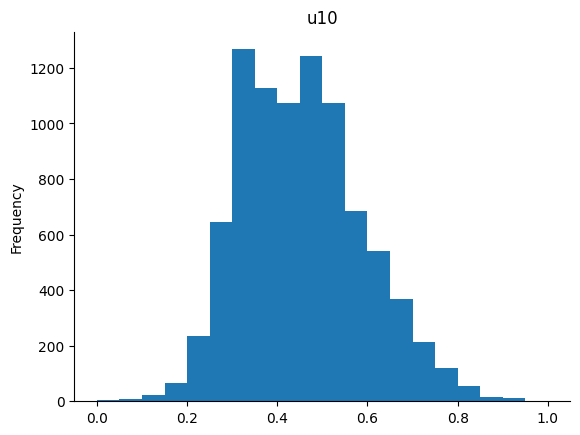

In [ ]:
# @title u10

from matplotlib import pyplot as plt
df_transformed['u10'].plot(kind='hist', bins=20, title='u10')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X=df_transformed.iloc[:,0:4]

In [ ]:
X

,u10,v10,u100,v100
0,0.516829,0.374918,0.493744,0.392741
1,0.538165,0.420297,0.510970,0.433314
2,0.546253,0.470261,0.516834,0.475553
3,0.534716,0.505070,0.506324,0.504549
4,0.523347,0.532411,0.497092,0.527793
...,...,...,...,...
8778,0.467204,0.547456,0.493665,0.579991
8779,0.505710,0.587083,0.492357,0.593853
8780,0.520482,0.591652,0.499000,0.591873
8781,0.532509,0.575637,0.507753,0.574809


In [ ]:
y=df_transformed['production']

In [ ]:
y

,production
0,0.000000
1,0.054905
2,0.110286
3,0.165194
4,0.157014
...,...
8778,0.065532
8779,0.092328
8780,0.042497
8781,0.104457


In [ ]:
y=pd.DataFrame(y,columns=['production'])

In [ ]:
y

,production
0,0.000000
1,0.054905
2,0.110286
3,0.165194
4,0.157014
...,...
8778,0.065532
8779,0.092328
8780,0.042497
8781,0.104457


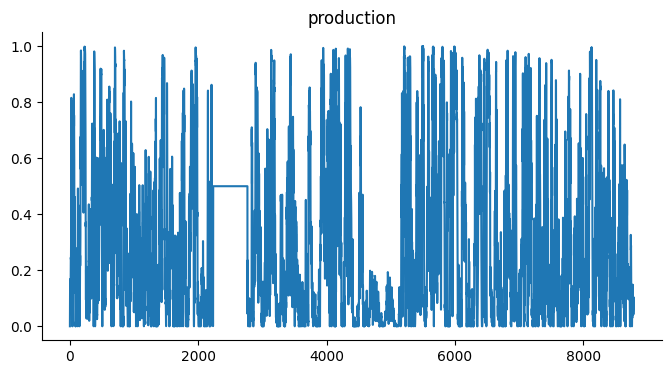

In [ ]:
# @title production

from matplotlib import pyplot as plt
y['production'].plot(kind='line', figsize=(8, 4), title='production')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
result=pd.concat([df['date'],y['production']],axis=1)

In [ ]:
result

,date,production
0,2020-01-01 01:00:00,0.000000
1,2020-01-01 02:00:00,0.054905
2,2020-01-01 03:00:00,0.110286
3,2020-01-01 04:00:00,0.165194
4,2020-01-01 05:00:00,0.157014
...,...,...
8778,2020-12-31 19:00:00,0.065532
8779,2020-12-31 20:00:00,0.092328
8780,2020-12-31 21:00:00,0.042497
8781,2020-12-31 22:00:00,0.104457


In [ ]:
result1=pd.concat([result,X],axis=1)

In [ ]:
result1

,date,production,u10,v10,u100,v100
0,2020-01-01 01:00:00,0.000000,0.516829,0.374918,0.493744,0.392741
1,2020-01-01 02:00:00,0.054905,0.538165,0.420297,0.510970,0.433314
2,2020-01-01 03:00:00,0.110286,0.546253,0.470261,0.516834,0.475553
3,2020-01-01 04:00:00,0.165194,0.534716,0.505070,0.506324,0.504549
4,2020-01-01 05:00:00,0.157014,0.523347,0.532411,0.497092,0.527793
...,...,...,...,...,...,...
8778,2020-12-31 19:00:00,0.065532,0.467204,0.547456,0.493665,0.579991
8779,2020-12-31 20:00:00,0.092328,0.505710,0.587083,0.492357,0.593853
8780,2020-12-31 21:00:00,0.042497,0.520482,0.591652,0.499000,0.591873
8781,2020-12-31 22:00:00,0.104457,0.532509,0.575637,0.507753,0.574809


In [ ]:
col = result1.pop('production')
result1['production'] = col

In [ ]:
result1.columns

Index(['date', 'u10', 'v10', 'u100', 'v100', 'production'], dtype='object')

In [ ]:
result1

,date,u10,v10,u100,v100,production
0,2020-01-01 01:00:00,0.516829,0.374918,0.493744,0.392741,0.000000
1,2020-01-01 02:00:00,0.538165,0.420297,0.510970,0.433314,0.054905
2,2020-01-01 03:00:00,0.546253,0.470261,0.516834,0.475553,0.110286
3,2020-01-01 04:00:00,0.534716,0.505070,0.506324,0.504549,0.165194
4,2020-01-01 05:00:00,0.523347,0.532411,0.497092,0.527793,0.157014
...,...,...,...,...,...,...
8778,2020-12-31 19:00:00,0.467204,0.547456,0.493665,0.579991,0.065532
8779,2020-12-31 20:00:00,0.505710,0.587083,0.492357,0.593853,0.092328
8780,2020-12-31 21:00:00,0.520482,0.591652,0.499000,0.591873,0.042497
8781,2020-12-31 22:00:00,0.532509,0.575637,0.507753,0.574809,0.104457


In [ ]:
X = result1[['u10', 'v10', 'v100', 'u100']]
y = result1[['production']]


In [ ]:
X

,u10,v10,v100,u100
0,0.516829,0.374918,0.392741,0.493744
1,0.538165,0.420297,0.433314,0.510970
2,0.546253,0.470261,0.475553,0.516834
3,0.534716,0.505070,0.504549,0.506324
4,0.523347,0.532411,0.527793,0.497092
...,...,...,...,...
8778,0.467204,0.547456,0.579991,0.493665
8779,0.505710,0.587083,0.593853,0.492357
8780,0.520482,0.591652,0.591873,0.499000
8781,0.532509,0.575637,0.574809,0.507753


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import warnings



def create_lagged_features(X, y, lag=5):
    X_lagged = []
    y_lagged = []
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()  # Convert DataFrame to NumPy array
    elif not isinstance(X, np.ndarray):
        X = np.array(X, dtype=float)

    if isinstance(y, (pd.Series, pd.DataFrame)):
        y = y.to_numpy()  # Convert Series/DataFrame to NumPy array
    elif not isinstance(y, np.ndarray):
        y = np.array(y, dtype=float)

    for i in range(lag, len(X)):
        X_lagged.append(X[i-lag:i].flatten())
        y_lagged.append(y[i])
    return np.array(X_lagged), np.array(y_lagged)
lag = 5
X_lagged, y_lagged = create_lagged_features(X, y, lag)



In [ ]:
train_size = int(0.8 * len(X_lagged))
X_train, X_test = X_lagged[:train_size], X_lagged[train_size:]
y_train, y_test = y_lagged[:train_size].ravel(), y_lagged[train_size:].ravel()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_train = y_train.ravel()#making the y_train to 1D so that the error of key interruption will not come
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
pd.DatetimeIndex


pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
y1=rf_model.predict(X_test)

In [ ]:
columns_transformed1=pd.DataFrame(y1,columns=['production_predic'])

In [ ]:
columns_transformed1

,production_predic
0,0.096750
1,0.098009
2,0.081692
3,0.111195
4,0.132400
...,...
1751,0.036851
1752,0.126915
1753,0.106980
1754,0.117167


In [ ]:
columns_transformed1


,production_predic
0,0.096750
1,0.098009
2,0.081692
3,0.111195
4,0.132400
...,...
1751,0.036851
1752,0.126915
1753,0.106980
1754,0.117167


In [ ]:
y_test_df = pd.DataFrame(y_test, columns=['production'])

y_test_df=pd.concat([y_test_df,columns_transformed1],axis=1)

In [ ]:
y_test_df

,production,production_predic
0,0.036480,0.096750
1,0.019744,0.098009
2,0.073806,0.081692
3,0.123167,0.111195
4,0.170083,0.132400
...,...,...
1751,0.065532,0.036851
1752,0.092328,0.126915
1753,0.042497,0.106980
1754,0.104457,0.117167


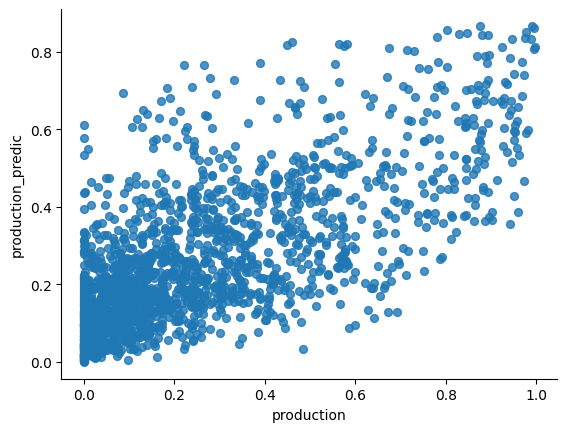

In [ ]:
# @title production vs production_predic

from matplotlib import pyplot as plt
y_test_df.plot(kind='scatter', x='production', y='production_predic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
model=MinMaxScaler()

In [ ]:
# Create a new scaler specifically for the 'production' column
production_scaler = MinMaxScaler()
production_scaler.fit(df[['production']])

# Inverse transform the actual and predicted production values
y_test_df['production_actual_unscaled'] = production_scaler.inverse_transform(y_test_df[['production']])
y_test_df['production_pred_unscaled'] = production_scaler.inverse_transform(y_test_df[['production_predic']])




In [ ]:
y_test_df

,production,production_predic
0,0.036480,0.096750
1,0.019744,0.098009
2,0.073806,0.081692
3,0.123167,0.111195
4,0.170083,0.132400
...,...,...
1751,0.065532,0.036851
1752,0.092328,0.126915
1753,0.042497,0.106980
1754,0.104457,0.117167


In [ ]:
y_test_df['production'].max()

0.9966152545792063

In [ ]:
y_test_df['production'].min()

0.0

In [ ]:
y_test_df['production_predic'].max()-y_test_df['production_predic'].min()

0.9966152545792063

,production_predic
0,0.096750
1,0.098009
2,0.081692
3,0.111195
4,0.132400
...,...
1751,0.036851
1752,0.126915
1753,0.106980
1754,0.117167


Mean Squared Error: 0.0077
Predicted target for t+1: 0.1114


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


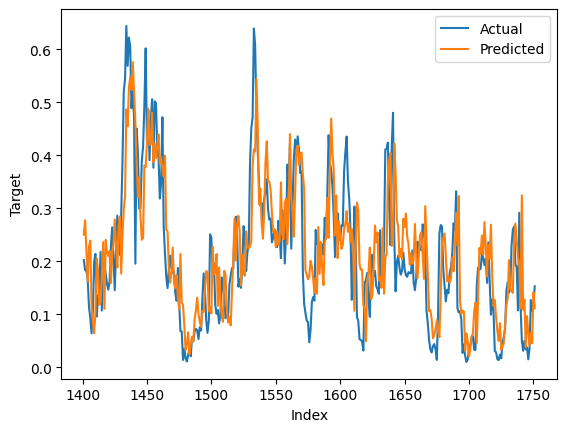

In [ ]:
def create_lagged_features(y_test_df, lags=3):
    df_lagged = y_test_df.copy()
    for lag in range(1, lags + 1):
        # Create lagged features for each feature and target
        for col in ['production', 'production_predic']:
            df_lagged[f'{col}_lag{lag}'] = df_lagged[col].shift(lag)

    # Create target for t+1
    df_lagged['production_predic+1'] = df_lagged['production_predic'].shift(-1)

    # Drop rows with NaN values due to shifting, but keep the date column
    df_lagged = df_lagged.dropna().reset_index(drop=True)
    return df_lagged

# Create lagged features (e.g., t-1, t-2, t-3)
lags = 3
df_lagged = create_lagged_features(y_test_df, lags)

# Define features and target
feature_cols = [col for col in df_lagged.columns if 'lag' in col]
X = df_lagged[feature_cols]
y = df_lagged['production_predic+1']

# Split data (80% train, 20% test, preserve time order)
train_size = int(0.8 * len(df_lagged))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Predict t+1 for the last available data point
last_data = df_lagged[feature_cols].iloc[-1:].values
next_pred = model.predict(last_data)
print(f'Predicted target for t+1: {next_pred[0]:.4f}')

# Optional: Plot results
import matplotlib.pyplot as plt
# Get the dates corresponding to the test set
test_dates = df_lagged.index[train_size:]

plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

In [ ]:
merged_df=pd.merge(result1, y_test_df, on='production',how='right')


merged_df = merged_df.drop_duplicates(subset=['date','u10','v10','u100','v100','production'], keep='first')

In [ ]:
merged_df
merged_df

,date,u10,v10,u100,v100,production,production_predic
0,2020-09-18 01:00:00,0.480042,0.575387,0.458950,0.571614,0.036480,0.096750
1,2020-10-19 20:00:00,0.496656,0.493754,0.510675,0.502405,0.036480,0.096750
2,2020-10-19 21:00:00,0.531577,0.488890,0.513475,0.498115,0.019744,0.098009
3,2020-03-26 06:00:00,0.420040,0.618274,0.406585,0.604577,0.073806,0.081692
4,2020-10-19 22:00:00,0.536411,0.491185,0.515097,0.498803,0.073806,0.081692
...,...,...,...,...,...,...,...
125424,2020-12-31 19:00:00,0.467204,0.547456,0.493665,0.579991,0.065532,0.036851
125425,2020-12-31 20:00:00,0.505710,0.587083,0.492357,0.593853,0.092328,0.126915
125429,2020-05-07 15:00:00,0.489145,0.406435,0.555156,0.358842,0.104457,0.117167
125430,2020-12-31 22:00:00,0.532509,0.575637,0.507753,0.574809,0.104457,0.117167


In [ ]:
merged_df.drop_duplicates(inplace=True)

In [ ]:
merged_df

,date,u10,v10,u100,v100,production,production_predic
0,2020-09-18 01:00:00,0.480042,0.575387,0.458950,0.571614,0.036480,0.096750
1,2020-10-19 20:00:00,0.496656,0.493754,0.510675,0.502405,0.036480,0.096750
2,2020-10-19 21:00:00,0.531577,0.488890,0.513475,0.498115,0.019744,0.098009
3,2020-03-26 06:00:00,0.420040,0.618274,0.406585,0.604577,0.073806,0.081692
4,2020-10-19 22:00:00,0.536411,0.491185,0.515097,0.498803,0.073806,0.081692
...,...,...,...,...,...,...,...
125424,2020-12-31 19:00:00,0.467204,0.547456,0.493665,0.579991,0.065532,0.036851
125425,2020-12-31 20:00:00,0.505710,0.587083,0.492357,0.593853,0.092328,0.126915
125429,2020-05-07 15:00:00,0.489145,0.406435,0.555156,0.358842,0.104457,0.117167
125430,2020-12-31 22:00:00,0.532509,0.575637,0.507753,0.574809,0.104457,0.117167


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
submission1=pd.merge(df[['date','u10']],total1,on='u10',how='inner')

In [ ]:
'''import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Convert X to NumPy array
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()  # Convert DataFrame to NumPy array
elif not isinstance(X, np.ndarray):
    X = np.array(X, dtype=float)

# Convert y to NumPy array and ensure 1D for regression
if isinstance(y, (pd.Series, pd.DataFrame)):
    y = y.to_numpy().ravel()  # Convert to 1D array
elif not isinstance(y, np.ndarray):
    y = np.array(y, dtype=float).ravel()

# Verify X has 4 features
if X.shape[1] != 4:
    raise ValueError(f"Expected 4 features, but got {X.shape[1]}")

# Reshape X for LSTM: (samples, timesteps=1, features=4)
#X_lstm = X.reshape(X.shape[0], 1, X.shape[1])

lag = 5
X_lagged, y_lagged = create_lagged_features(X, y, lag)


X_lstm = X[lag:].reshape(-1, 1, X.shape[1])  # Start from lag to align with X_lagged
y_lstm = y[lag:]  # Align with y_lagged

# Split data (ensure train_size is defined)
train_size_lagged = int(0.8 * len(X_lagged))
train_size = int(0.8 * X.shape[0])  # Example: 80% for training
#X_train_lstm = X_lstm[:train_size]
#y_train_lstm = y[:train_size]
#X_test_lstm = X_lstm[train_size:]
#y_test_lstm = y[train_size:]
X_train_lstm = X_lstm[:train_size_lstm]
y_train_lstm = y_lstm[:train_size_lstm] # Note: Use y_lstm here
X_test_lstm = X_lstm[train_size_lstm:]
y_test_lstm = y_lstm[train_size_lstm:]








# Define and compile LSTM model


lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 4), return_sequences=False),
    Dense(1)
])

# Train model
'''


'import pandas as pd\nimport numpy as np\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense\n\n# Convert X to NumPy array\nif isinstance(X, pd.DataFrame):\n    X = X.to_numpy()  # Convert DataFrame to NumPy array\nelif not isinstance(X, np.ndarray):\n    X = np.array(X, dtype=float)\n\n# Convert y to NumPy array and ensure 1D for regression\nif isinstance(y, (pd.Series, pd.DataFrame)):\n    y = y.to_numpy().ravel()  # Convert to 1D array\nelif not isinstance(y, np.ndarray):\n    y = np.array(y, dtype=float).ravel()\n\n# Verify X has 4 features\nif X.shape[1] != 4:\n    raise ValueError(f"Expected 4 features, but got {X.shape[1]}")\n\n# Reshape X for LSTM: (samples, timesteps=1, features=4)\n#X_lstm = X.reshape(X.shape[0], 1, X.shape[1])\n\nlag = 5\nX_lagged, y_lagged = create_lagged_features(X, y, lag)\n\n\nX_lstm = X[lag:].reshape(-1, 1, X.shape[1])  # Start from lag to align with X_lagged\ny_lstm = y[lag:]  # Align with y_lagged\n\n# Spli

In [ ]:


forecast_steps = 30  # Forecast 30 days into the future
train_end = '2020-12-31 23:00:00'
train_data = result[:train_end]['production']

TypeError: cannot do slice indexing on RangeIndex with these indexers [2020-12-31 23:00:00] of type str

In [ ]:
model_1=RandomForestRegressor()
model_2=xgb.XGBRegressor()
model_3=LinearRegression()

NameError: name 'xgb' is not defined

In [ ]:
model_4=[model_1,model_2,model_3]
for name in model_4:
    name.fit(X,y)


In [ ]:
print(result1)

In [ ]:
X_test=

In [ ]:
pred_1 = model_1.predict(X)
pred_2 = model_2.predict(X)
pred_3 = model_3.predict(X)

In [ ]:
model_1.score(X,y)

In [ ]:
model_2.score(X,y)

In [ ]:
model_3.score(X,y)

In [ ]:

final_production = (pred_1+pred_2+pred_3)/3.0

In [ ]:
final_production

In [ ]:
production_predic=pd.DataFrame(final_production,columns=['production_predic'])

In [ ]:
production_predic

In [ ]:
X=X_test

In [ ]:
X.reset_index(drop=True,inplace=True)

In [ ]:
X

In [ ]:
X

In [ ]:


'''
X["new_index"] = range(0,1757)
X = X.set_index("new_index")
X
'''

In [ ]:
X['predicted']=production_predic['production_predic']
X

In [ ]:

x5 = X.merge(y_test, left_index=True, right_index=True)
x5




In [ ]:
x5

In [ ]:
#X['Actual']=x1['production']
#X

In [ ]:
#y_test

In [ ]:
#y_actual=pd.DataFrame(y_test)

In [ ]:
#y_actual

In [ ]:
'''y_actual["new_index"] = range(0,1757)
y_actual = y_actual.set_index("new_index")
y_actual
'''

In [ ]:
#submission=pd.merge(X, y_actual, left_index=True, right_index=True)


In [ ]:
#submission

In [ ]:
#submission.describe()

In [ ]:
#submission

In [ ]:
df3=model.inverse_transform(x5[['u10','v10','u100','v100','predicted',]])

In [ ]:
df4=model.inverse_transform(x5[['u10','v10','u100','v100','production']])

In [ ]:
df3

In [ ]:
df4

In [ ]:
#df5

In [ ]:
total1=pd.DataFrame(df4,columns=['u10','v10','u100','v100','Actual'])

In [ ]:
total1

In [ ]:
total=pd.DataFrame(df3,columns=['u10','v10','u100','v100','predicted'])

In [ ]:
total1['predicted']=total['predicted']

In [ ]:
total1

In [ ]:
total1=total1.round(4)

In [ ]:
df

In [ ]:
df.index

In [ ]:
df=df.round(4)

In [ ]:
#merged_df = pd.merge(df1, df2, on='ID', how='outer')



#submission1=pd.merge(df,total1,on='v10',how='inner')
submission1=pd.merge(df[['date','u10']],total1,on='u10',how='inner')
#submission1=pd.merge(total1,df[['date','u10']],on='u10',how='inner')

In [ ]:
submission1

In [ ]:
import pandas as pd

def find_repeated_rows(submission1):
    """
    Identifies and returns repeated rows in a pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing only the repeated rows.
                      Returns an empty DataFrame if no repetitions are found.
    """
    repeated_rows = submission1[submission1.duplicated(keep=False)]
    return repeated_rows


repeated_df = find_repeated_rows(submission1)

if not repeated_df.empty:
    print("Repeated rows:")
    print(repeated_df)
else:
    print("No repeated rows found.")

In [ ]:
submission1.describe()

In [ ]:
len(submission1)

In [ ]:
#submission1.index = pd.RangeIndex(start=1957, stop=len(submission1)+1)

In [ ]:
submission1

In [ ]:
'''submission=pd.merge(submission,submission1['production_predic'],left_index=True)
submission
'''

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
submission1.plot('date','v10',figsize=(12,8))


In [ ]:
submission1.plot('date','u10',figsize=(12,8))

In [ ]:
submission1.plot('date','u100',figsize=(12,8))

In [ ]:
submission1.plot('date','Actual',figsize=(12,8))# our concern is production only
submission1.plot('date','predicted',figsize=(12,8))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(submission1['date'], submission1['Actual'], '-b', label='date Vs Actual')
plt.plot(submission1['date'], submission1['predicted'], '-r', label='date Vs predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
submission1

In [ ]:
submission1

In [ ]:
submission2=submission1.iloc[:,[0,5,6]]

In [ ]:
submission2


In [ ]:
submission_4=submission2.iloc[:,[0,1]]

In [ ]:
submission_4

In [ ]:
submission_4

In [ ]:
#submission_4=submission_4.set_index('date')
submission_4=submission_4.set_index('date')

In [ ]:
submission_4.index

In [ ]:
submission_4.index.hour

In [ ]:
def create_features(submission_4):
    """
    Create time series features based on time series index.
    """
    submission_4 = submission_4.copy()
    submission_4['hour'] = submission_4.index.hour
    submission_4['dayofweek'] = submission_4.index.dayofweek
    submission_4['quarter'] = submission_4.index.quarter
    submission_4['month'] = submission_4.index.month
    submission_4['year'] = submission_4.index.year
    submission_4['dayofyear'] = submission_4.index.dayofyear
    submission_4['dayofmonth'] = submission_4.index.day
    submission_4['weekofyear'] = submission_4.index.isocalendar().week
    return submission_4

submission_4 = create_features(submission_4)

In [ ]:
submission_4

In [ ]:
submission_4.loc[(submission_4.index > '2020-01-10 23:00:00') & (submission_4.index < '2020-04-10 23:00:00')] \
    .plot(figsize=(15, 5), title='month of data')
plt.show()

In [ ]:
submission2

In [ ]:
submission3=submission2.iloc[:,[1]]

In [ ]:
submission3

In [ ]:
def create_supervised_data(submission3, n_lags=5, n_ahead=1):
    """
    Convert time series into supervised learning format.
    n_lags: number of past time steps to use as features
    n_ahead: number of future time steps to predict
    """
    X, y = [], []
    columns = submission3.columns
    n_features = len(columns)

    for i in range(n_lags, len(submission3) - n_ahead + 1):
        # Extract lagged values for all features
        lagged_data = []
        for lag in range(n_lags):
            lagged_data.append(submission3.iloc[i - n_lags + lag].values)
        X.append(np.concatenate(lagged_data))
        # Target is the future value of 'y'
        y.append(submission3['y'].iloc[i + n_ahead - 1])

    return np.array(X), np.array(y)


In [ ]:
def forecast_future(model, last_sequence, n_future, scaler_X, scaler_y, n_lags, n_features):
    """
    Generate future predictions iteratively.
    last_sequence: last known data window
    n_future: number of future steps to predict
    """
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_future):
        # Reshape for model prediction
        current_sequence_scaled = scaler_X.transform(current_sequence.reshape(1, -1))
        pred_scaled = model.predict(current_sequence_scaled)
        pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1))[0, 0]
        future_predictions.append(pred)

        # Update sequence: shift left and append new prediction
        new_sequence = np.zeros((n_lags, n_features))
        new_sequence[:-1, :] = current_sequence[1:, :]  # Shift
        new_sequence[-1, 0] = pred  # Append new prediction to 'y'
        # For x1, x2, assume continuation of last known values or model them separately
        new_sequence[-1, 1:] = current_sequence[-1, 1:]
        current_sequence = new_sequence

    return future_predictions


In [ ]:
def main():
    # Parameters
    n_lags = 5  # Number of past time steps
    n_ahead = 1  # Predict one step ahead
    n_future = 10  # Forecast 10 steps into the future
    test_size = 0.2

    # Load or generate data
    data = submission3()

    # Scale features and target
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    data_scaled = pd.DataFrame(scaler_X.fit_transform(data), columns=data.columns)
    data['y_scaled'] = scaler_y.fit_transform(data[['y']])

    # Create supervised dataset
    X, y = create_supervised_data(data_scaled, n_lags=n_lags, n_ahead=n_ahead)

    # Split into train and test
    train_size = int(len(X) * (1 - test_size))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = np.mean((y_pred - y_test) ** 2)
    print(f"Test MSE: {mse:.4f}")

    # Forecast future values
    last_sequence = data_scaled.iloc[-n_lags:].values  # Last window of data
    future_predictions = forecast_future(model, last_sequence, n_future, scaler_X, scaler_y, n_lags, len(data.columns))

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['y'], label='Historical Data')
    future_index = range(len(data), len(data) + n_future)
    plt.plot(future_index, future_predictions, label='Future Predictions', linestyle='--')
    plt.legend()
    plt.title('Multivariate Time Series Forecasting')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.savefig('time_series_forecast.png')
    plt.close()



In [ ]:
    plt.figure(figsize=(12, 6))
    plt.plot(submission3.index, submission3['y'], label='Historical Data')
    future_index = range(len(submission3), len(submission3) + n_future)
    plt.plot(future_index, future_predictions, label='Future Predictions', linestyle='--')
    plt.legend()
    plt.title('Multivariate Time Series Forecasting')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.savefig('time_series_forecast.png')
    plt.close()


In [ ]:
#making it as a supervisory model
submission2['submission_lastday']=submission2['predicted'].shift(+1)
submission2['submission_second_last_day']=submission2['predicted'].shift(+2)
submission2['submission_twodays_backsubmission']=submission2['predicted'].shift(+3)
submission2

In [ ]:
final_submission=submission2.dropna()

In [ ]:
final_submission


In [ ]:
final_submission.reset_index(drop=True,inplace=True)

In [ ]:
final_submission

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
final_submission.set_index('date')

In [ ]:
def create_features(final_submission):
    """
    Create time series features based on time series index.
    """
   final_submission = final_submission.copy()
   final_submission['hour'] = final_submission.index.hour
   final_submission['dayofweek'] = final_submission.index.dayofweek
    final_submission['quarter'] = final_submission.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [ ]:
for i in range(1, 4):
    submission1[f'target_lag_{i}'] = submission1['predicted'].shift(i)

# Split data

X_train = submission1.drop('predicted', axis=1)[:int(len(submission1) * 0.8)]

y_train = submission1['predicted'][:int(len(submission1) * 0.8)]

X_test = submission1.drop('predicted', axis=1)[int(len(submission1) * 0.8):]



# Train the model

model = RandomForestRegressor()

model.fit(X_train, y_train)



# Predict on future dates (assuming 'future_data' is a DataFrame with lagged features for future dates)

future_predictions = model.predict(X_test)

In [ ]:
# Create a new scaler specifically for the 'production' column
production_scaler = MinMaxScaler()
production_scaler.fit(df[['production']])

# Inverse transform the actual and predicted production values
y_test_df['production_actual_unscaled'] = production_scaler.inverse_transform(y_test_df[['production']])
y_test_df['production_pred_unscaled'] = production_scaler.inverse_transform(y_test_df[['production_predic']])

display(y_test_df.head())

In [ ]:
# Create a new scaler specifically for the 'production' column
production_scaler = MinMaxScaler()
production_scaler.fit(df[['production']])

# Inverse transform the actual and predicted production values
y_test_df['production_actual_unscaled'] = production_scaler.inverse_transform(y_test_df[['production']])
y_test_df['production_pred_unscaled'] = production_scaler.inverse_transform(y_test_df[['production_predic']])

display(y_test_df.head())